# Program - AMdecoderbitstring
Decodes an AM modulated signal from a sound file, with name in the argument
E.g.,: python AMdecoderbitstring.py amfile.wav

    - Gerald Schuller, Januar 2015

* **Import the relevant modules:**

In [1]:
import sound
import scipy
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2

In [2]:
CHUNK = 1024

print("filename=", sys.argv[1])
sndfile = sys.argv[1]

('filename=', '-f')


* **Read in sound file:**

In [3]:
[AM, FS] = sound.wavread(sndfile)

('Number of channels: ', 1)
('Number of bytes per sample:', 2)
('Sampling rate: ', 16000)
('Number of samples:', 156800)


* **Length of the sound:**

In [4]:
lenAM = scipy.size(AM)

* **Compute the low pass filter coefficients, with 10 Hz cutoff frequency:**

In [5]:
[b,a]=scipy.signal.iirfilter(2, 20.0/(FS/2),rp=60,btype='lowpass')
[w,H]=scipy.signal.freqz(b,a)
Ha=scipy.absolute(H)

* **Plot in dB on normalized frequency axis w:**

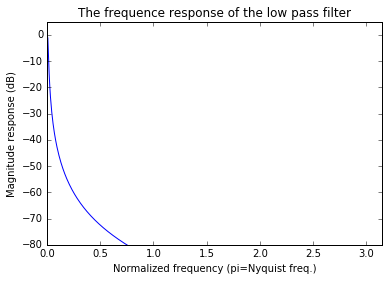

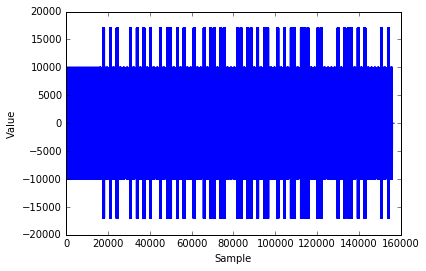

In [6]:
fig=plt.figure()
#plt.plot(w,Ha)
plt.plot(w,20*np.log10(Ha))
plt.title('The frequence response of the low pass filter')
plt.xlabel('Normalized frequency (pi=Nyquist freq.)') 
plt.ylabel('Magnitude response (dB)')
plt.axis([0,3.15,-80, 5])

fig=plt.figure()
fig.canvas.set_window_title('Das AM Signal mit Clock- und Bit-Signal')
plt.plot(AM)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

* **Compute average power to remove silence:**

In [7]:
p=scipy.signal.lfilter(b, a, scipy.power(AM,2))
print("Filter the bit component:")

Filter the bit component:


* **Get the bit frequency component at 1 kHz by down mixing:sinus Traeger:**

In [8]:
traegersin = scipy.sin(2*scipy.pi/FS*1000*scipy.arange(0,lenAM))
downmixAMbits_sin=(traegersin*AM)

* **De-modulate by low pass filtering and taking abs value (bit and clock are always positive)**

In [9]:
decAMbits_sin = scipy.signal.lfilter(b, a, downmixAMbits_sin)

* **Cosinus Traeger:**

In [10]:
traegercos = scipy.cos(2 * scipy.pi / FS * 1000 * scipy.arange(0, lenAM))
downmixAMbits_cos = (traegercos * AM)

* **De-modulate by low pass filtering and taking abs value (bit and clock are always positive):**

In [11]:
decAMbits_cos=scipy.signal.lfilter(b, a, downmixAMbits_cos)

* **Berechne betrag der komplexen Demodulation:**

In [12]:
decAMbits = np.sqrt(decAMbits_sin ** 2 + decAMbits_cos ** 2)

In [13]:
fig=plt.figure()
fig.canvas.set_window_title('Das demodulierte Bit Signal')
plt.plot(decAMbits)
plt.xlabel('Sample')
plt.ylabel('Value')

* **Get the clock frequency component at 2 kHz:**

In [14]:
traegersin = scipy.sin(2 * scipy.pi / FS * 2000 * scipy.arange(0,lenAM))

* **Down mix, magnitude:(for sin)**

In [15]:
downmixAMclock_sin = (traegersin * AM)
print("filter the clock component")

filter the clock component


* **De-modulate by low pass filtering:(for sin)**

In [16]:
decAMclock_sin = scipy.signal.lfilter(b, a, downmixAMclock_sin)
traegercos = scipy.cos(2 * scipy.pi / FS * 2000 * scipy.arange(0,lenAM))

* **Down mix, magnitude:(for cos)**

In [17]:
downmixAMclock_cos = (traegercos * AM)

* **De-modulate by low pass filtering:(for cos)**

In [18]:
decAMclock_cos=scipy.signal.lfilter(b, a, downmixAMclock_cos);

* **Taking complec magnitude:**

In [19]:
decAMclock=np.sqrt(decAMclock_sin**2+decAMclock_cos**2)

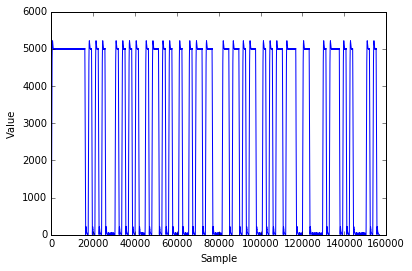

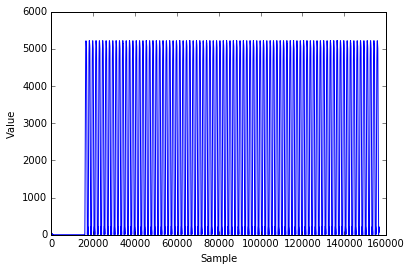

In [20]:
fig=plt.figure()
fig.canvas.set_window_title('Das demodulierte Clock Signal')
plt.plot(decAMclock)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

* **Schwelle zwischen 0 und 1 fuer die clock:**

In [21]:
schwellec = max(decAMclock)/2.0

* **Shwelle zwische 0 und 1 fuer die bits:**

In [22]:
schwelle = max(decAMbits)/2.0;
print("schwelle=", schwelle)

('schwelle=', 2609.0060085009095)


* **Laenge des empfangenen geglaetteten Signals:**

In [23]:
laenge=max(decAMbits.shape)

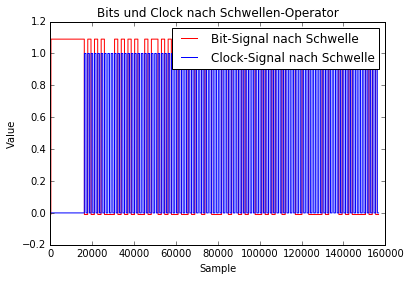

In [24]:
fig=plt.figure()
plt.plot((decAMbits>schwelle)*1.1-0.01,'r')
#fig=plt.figure()
plt.plot((decAMclock> schwellec),'b')
#plt.axis([0,10000 , -0.1, 1.1])
plt.title('Bits und Clock nach Schwellen-Operator')
plt.legend(('Bit-Signal nach Schwelle', 'Clock-Signal nach Schwelle'))
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

* **Decodieren der Bits:**

In [25]:
print("Decodieren der Bits:")

Decodieren der Bits:


* **Abtast-Intervall fuer geglaetetes Signal:**

In [26]:
interv = 40

* **Bitcounter:**

In [27]:
m = 0 

* **Bit-array:**

In [28]:
bitstring=''
for n in range(interv,laenge,interv):
    #bei ueberschreiten der Schwelle des clock signales lese Bt aus:
    if ((decAMclock[n-interv] > schwellec) and  (decAMclock[n]< schwellec) ):
        #Auslesen des bits:
        print("clock detected at sample:",n)
        if (decAMbits[n] > schwelle):
            print("Bit detected: 1")
            bitstring=bitstring+ '1'
        else:
            print("Bit detected: 0")
            bitstring=bitstring+ '0'
        m = m+1

from writereadbits import writebinaryfile

print "decoded bitstring= ", bitstring
print "write to binary file"
writebinaryfile('AMdecoded.bin', bitstring)

('clock detected at sample:', 17000)
Bit detected: 0
('clock detected at sample:', 18600)
Bit detected: 1
('clock detected at sample:', 20200)
Bit detected: 0
('clock detected at sample:', 21800)
Bit detected: 1
('clock detected at sample:', 23400)
Bit detected: 0
('clock detected at sample:', 25000)
Bit detected: 1
('clock detected at sample:', 26600)
Bit detected: 0
('clock detected at sample:', 28200)
Bit detected: 0
('clock detected at sample:', 29800)
Bit detected: 0
('clock detected at sample:', 31400)
Bit detected: 1
('clock detected at sample:', 33000)
Bit detected: 0
('clock detected at sample:', 34600)
Bit detected: 1
('clock detected at sample:', 36200)
Bit detected: 0
('clock detected at sample:', 37800)
Bit detected: 1
('clock detected at sample:', 39400)
Bit detected: 0
('clock detected at sample:', 41000)
Bit detected: 1
('clock detected at sample:', 42600)
Bit detected: 0
('clock detected at sample:', 44200)
Bit detected: 0
('clock detected at sample:', 45800)
Bit detec